In this Jupyter Notebook there is the application of PCA over 
the "Pizza's Components" dataset.
The canonical representation of a dataset is the following.<br>
It is a datamatrix $X \in R^{n \times p}$ where: <br>
$\hspace{1cm}\bullet \hspace{0.5cm}n$ is the number of samples<br>
$\hspace{1cm}\bullet \hspace{0.5cm}p$ is the number of the features

On the rows there are samples while on the columns there are features:<br>
$\hspace{1cm}\bullet \hspace{0.5cm} x_{i} \in R^{p} \rightarrow$ each sample is a vector in a $p$-dimensional space <br>
$\hspace{1cm}\bullet \hspace{0.5cm} p_{j} \in R^{n} \rightarrow$ each feature is a vector in a $n$-dimensional space <br>


In [24]:
import funcs
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
np.set_printoptions(suppress=True, linewidth=130)

Pandas Version: 1.0.3
Numpy Version: 1.18.4
Matplotlib Version: 3.2.1
Scikit-learn Version: 0.23.1
Seaborn Version: 0.10.1


Now it will be loaded the dataset about arrests in USA

In [25]:
dataframe = pd.read_csv("datasets/Pizza.csv")
n = np.shape(dataframe)[0]
p = np.shape(dataframe)[1]
print("Shape of Dataset: {}\n\t* Number of samples:\t{}\n\t* Number of features:\t{}"
      .format(np.shape(dataframe), n, p))

Shape of Dataset: (300, 9)
	* Number of samples:	300
	* Number of features:	9


This is a first inspection about<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Type of columns<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Missing values

In [26]:
print(funcs.InfoColumns(dataframe))

  Column Name     Type  Null Values
0       brand   object            0
1          id    int64            0
2        mois  float64            0
3        prot  float64            0
4         fat  float64            0
5         ash  float64            0
6      sodium  float64            0
7        carb  float64            0
8         cal  float64            0


These are some statistics useful to steer the whole analysis:<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Descriptive statistics <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Skewness <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Kurtosis <br>


In [27]:
print(dataframe.describe(include='all'))

       brand            id        mois        prot         fat         ash  \
count    300    300.000000  300.000000  300.000000  300.000000  300.000000   
unique    10           NaN         NaN         NaN         NaN         NaN   
top        H           NaN         NaN         NaN         NaN         NaN   
freq      33           NaN         NaN         NaN         NaN         NaN   
mean     NaN  20841.040000   40.903067   13.373567   20.229533    2.633233   
std      NaN   6962.917222    9.552987    6.434392    8.975658    1.269724   
min      NaN  14003.000000   25.000000    6.980000    4.380000    1.170000   
25%      NaN  14093.750000   30.902500    8.060000   14.770000    1.450000   
50%      NaN  24020.500000   43.300000   10.440000   17.135000    2.225000   
75%      NaN  24110.250000   49.115000   20.022500   21.435000    3.592500   
max      NaN  34045.000000   57.220000   28.480000   47.200000    5.430000   

            sodium        carb         cal  
count   300.000000

In [28]:
print(dataframe.drop(['brand','id'], axis=1).skew(axis=0))

mois     -0.040579
prot      0.865951
fat       1.562153
ash       0.679435
sodium    1.819191
carb      0.053110
cal       1.074278
dtype: float64


In [29]:
print("\n",dataframe.drop(['brand','id'], axis=1).kurtosis(axis=0))


 mois     -1.532346
prot     -0.752779
fat       1.905157
ash      -0.877479
sodium    2.264146
carb     -1.671596
cal       1.188494
dtype: float64


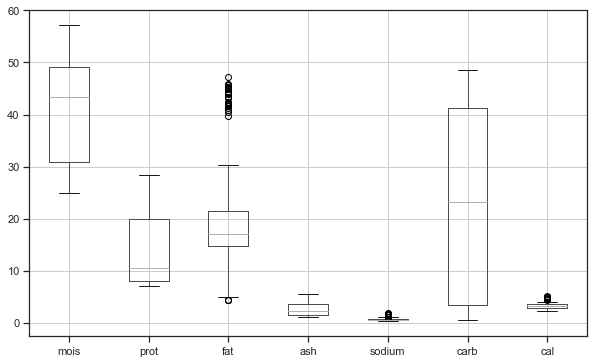

In [30]:
plt.figure(figsize=(10,6))
dataframe.drop(['brand','id'], axis=1).boxplot(figsize=(10,6))
plt.savefig("images/boxplot_pizza.png")

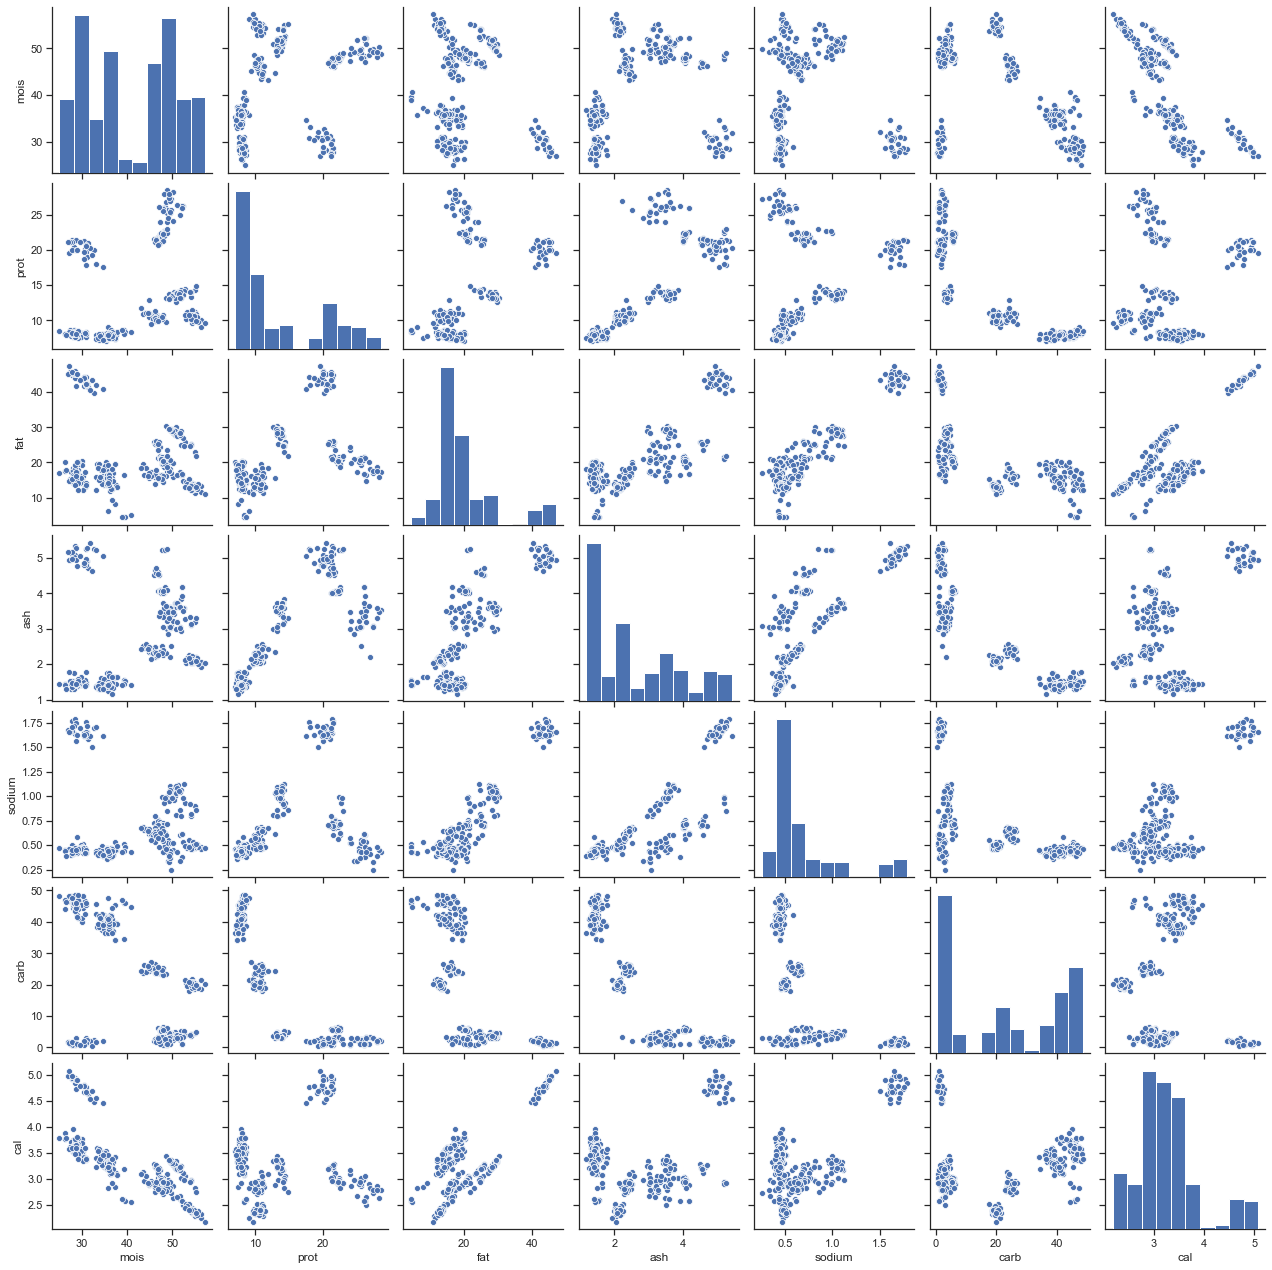

In [31]:
sns.set(style="ticks", color_codes=True)
scatter = sns.pairplot(data=dataframe.drop(['id'], axis=1), markers='o')
scatter.savefig("images/scatter_pizza.png")

Now it will computed the centered version of the dataset.<br>
***
What does it means?<br>
***
In this way, it's performed a shift from the original canonical axis into the center of the distribution of the 
dataset.<br>
It's computed an approximation which allows to discuss about the linear relationships (if exist) among features

In this specific case it has been dropped the columns about brand and id

In [32]:
X = dataframe.drop(['brand', 'id'], axis=1).values

In [33]:
Xc = X - np.mean(X, axis=0)

Now there are two different strategies: <br>
***
PCA over the Covariance Matrix $C_{X_{C}}$<br> 
if the variances respect the order of importance that we want to attribute to the variables (it's defined a hierarchy 
based on relevance)<br>
PCA over the Correlation Matrix $R_{X_{C}}$ <br>
if we want to attribute the same importance to all the variables<br>

***
HOW CAN WE CHOOSE WHAT MATRIX TO USE?
***
It must be computed some statistical measures over the original dataset (this is a multivariate case, since $p>1$) and 
check what is the variance of each feature.<br>
In particular, if there is an high difference among variances, due to different measurement units, then it is 
recommended to compute the Correlation Matrix.
***
NB:: If the centered matrix $X_{C}$ is standardized, then $\implies (C_{X_{C}} = R_{X_{C}})$

Now it will be computed both the Covariance Matrix $C_{X_{C}}$ and the Correlation Matrix $R_{X_{C}}$ on the 
transpose of the centered dataset $C_{{(X)}^{T}}$, because the goal of this analysis is find, if exist, 
some relations among features and not samples.
***
(NB) Computing the Covariance matrix on the centered dataset is equivalent to compute it on the original ones

In [34]:
Cov_Xc = np.cov(Xc.T)
print("This is the Covariance Matrix C of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Cov_Xc)))

This is the Covariance Matrix C of the Transpose Centered Dataset:

[[  91.25955377   22.14358334  -14.68956779    3.22109607   -0.36186504 -101.93055413   -4.52791813]
 [  22.14358334   41.40140496   28.76104414    6.7307202     1.02262723  -99.01970034    0.28029776]
 [ -14.68956779   28.76104414   80.56244192    9.02193931    3.10256393 -103.60886432    4.25498074]
 [   3.22109607    6.7307202     9.02193931    1.61219787    0.38002101  -20.58032784    0.2570195 ]
 [  -0.36186504    1.02262723    3.10256393    0.38002101    0.13716486   -4.14119479    0.15430462]
 [-101.93055413  -99.01970034 -103.60886432  -20.58032784   -4.14119479  325.07089192   -0.26253522]
 [  -4.52791813    0.28029776    4.25498074    0.2570195     0.15430462   -0.26253522    0.38444247]]


In [35]:
Corr_Xc = np.corrcoef(Xc.T)
print("This is the Correlation Matrix R of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Corr_Xc)))

This is the Correlation Matrix R of the Transpose Centered Dataset:

[[ 1.          0.36024768 -0.17131821  0.26555552 -0.1022789  -0.59180165 -0.76444054]
 [ 0.36024768  1.          0.49800167  0.8238437   0.42912952 -0.85354226  0.0702581 ]
 [-0.17131821  0.49800167  1.          0.79163396  0.93332522 -0.64023817  0.7645671 ]
 [ 0.26555552  0.8238437   0.79163396  1.          0.80812215 -0.89898837  0.32646845]
 [-0.1022789   0.42912952  0.93332522  0.80812215  1.         -0.62017634  0.6719575 ]
 [-0.59180165 -0.85354226 -0.64023817 -0.89898837 -0.62017634  1.         -0.02348458]
 [-0.76444054  0.0702581   0.7645671   0.32646845  0.6719575  -0.02348458  1.        ]]


Then it will be computed the eigenvalues and eigenvectors of both matrices.

In [36]:
eigenvalues_covariance, eigenvectors_covariance = np.linalg.eig(Cov_Xc)
print("These are the eigenvalues of Covariance Matrix C:\n{}\n".format(np.array_str(eigenvalues_covariance)))
print("These are the eigenvectors of the Covariance Matrix C:\n{}".format(np.array_str(eigenvectors_covariance)))

These are the eigenvalues of Covariance Matrix C:
[421.58854013 101.82022418  16.82525242   0.18442633   0.00837373   0.00103717   0.00024383]

These are the eigenvectors of the Covariance Matrix C:
[[ 0.27696343  0.74707368 -0.35201618 -0.1958998   0.05947474  0.4409739   0.06989157]
 [ 0.26694146 -0.05573295  0.80971797 -0.25574709  0.08371924  0.4434898   0.02990365]
 [ 0.27893356 -0.65784531 -0.46797644 -0.25980215  0.03577564  0.4486243  -0.0198207 ]
 [ 0.0554341  -0.04060421  0.02222528  0.87144324 -0.16663351  0.45022025  0.07004339]
 [ 0.01114161 -0.02381376 -0.02624469  0.20145265  0.97831601 -0.03046345  0.00256524]
 [-0.87808436  0.00681755 -0.01246929 -0.16452461  0.05746968  0.4444054   0.02997697]
 [ 0.00060329 -0.06125383 -0.01006227 -0.04067807  0.00149699 -0.0804525   0.99399034]]


In [37]:
eigenvalues_correlation, eigenvectors_correlation = np.linalg.eig(Corr_Xc)
print("These are the eigenvalues of Correlation Matrix R:\n{}\n".format(np.array_str(eigenvalues_correlation)))
print("These are the eigenvectors of the Correlation Matrix R:\n{}".format(np.array_str(eigenvectors_correlation)))

These are the eigenvalues of Correlation Matrix R:
[4.1717819  2.29045739 0.41456234 0.09517423 0.02767702 0.00033761 0.00000952]

These are the eigenvectors of the Correlation Matrix R:
[[ 0.06470937  0.62827587 -0.42166894 -0.22072158  0.00647029 -0.4464499  -0.41856904]
 [ 0.3787609   0.26970665  0.74602744 -0.0105932   0.38798279  0.00017152 -0.27676464]
 [ 0.44666592 -0.23437908 -0.19930871 -0.50704216 -0.17336763  0.52540287 -0.37767153]
 [ 0.47188953  0.11099042  0.05627269  0.55239855 -0.6708857  -0.05886093 -0.0560214 ]
 [ 0.43570289 -0.20166165 -0.45516887  0.44627689  0.60261408 -0.00313099  0.00052432]
 [-0.42491371 -0.32031208  0.05223651  0.33433948 -0.0074369   0.00050885 -0.77606791]
 [ 0.2444873  -0.56745756  0.11331559 -0.27926315 -0.07800317 -0.72191385 -0.01205981]]


The matrix of eigenvectors (for C and R) represent the rotation matrix $A_{p}$ such that:<br>
$Y = X \cdot A_{p}$ where 
\begin{cases}
\bullet \hspace{0.5cm} Y \in R^{n \times p} \rightarrow \text{ this is the matrix of scores (PC's)}\\
\bullet \hspace{0.5cm} X \in R^{n \times p}  \rightarrow \text{ this is the original matrix}\\
\bullet \hspace{0.5cm} A_{p} \in R^{p \times p}  \rightarrow \text{this is the matrix of loadings}
\end{cases} <br>
The matrix $A_{p}$ rotates original data into the direction of maximum variance of the dataset and is useful to:<br>
$\hspace{1cm} 1. \hspace{0.5cm}$ Perform a feature selection of the original variables<br>
$\hspace{1cm} 2. \hspace{0.5cm}$ Gives Interpretation of the PC's <br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$in terms of magnitude of absolute values of axis<br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$using the correlation coefficients among PC's and original features $X_{i}$<br>

### Let's consider the matrix $A_{p}$ related to the Covariance Matrix $C$
In the column 1, the max absolute value is situated in position 6.<br>
Hence, the feature 'Carboydrates' is going to be relevant for the construction of $Y_{1}$<br><br>
In the column 2, the max absolute value is situated in position 1.<br>
Hence, the feature 'Mois' is going to be relevant for the construction of $Y_{2}$<br><br>
In the column 3, the max absolute value is situated in position 2.<br>
Hence, the feature 'Fat' is going to be relevant for the construction of $Y_{3}$<br><br>
In the column 4, the max absolute value is situated in position 4.<br>
Hence, the feature 'Ash' is going to be relevant for the construction of $Y_{4}$<br><br>
In the column 5, the max absolute value is situated in position 5.<br>
Hence, the feature 'Sodium' is going to be relevant for the construction of $Y_{5}$<br><br>
In the column 6, the max absolute value is situated in position 4.<br>
Hence, the feature 'Ash' is going to be relevant for the construction of $Y_{6}$<br><br>
In the column 7, the max absolute value is situated in position 7.<br>
Hence, the feature 'Calories' is going to be relevant for the construction of $Y_{7}$
***
### Let's consider the matrix $A_{p}$ related to the Correlation Matrix $R$<br><br>
In the column 1, the max absolute value is situated in position 4.<br>
Hence, the feature 'Ash' is going to be relevant for the construction of $Y_{1}$<br><br>
In the column 2, the max absolute value is situated in position 1.<br>
Hence, the feature 'Mois' is going to be relevant for the construction of $Y_{2}$<br><br>
In the column 3, the max absolute value is situated in position 2.<br>
Hence, the feature 'Protein' is going to be relevant for the construction of $Y_{3}$<br><br>
In the column 4, the max absolute value is situated in position 4.<br>
Hence, the feature 'Ash' is going to be relevant for the construction of $Y_{4}$<br><br>
In the column 5, the max absolute value is situated in position 4.<br>
Hence, the feature 'Ash' is going to be relevant for the construction of $Y_{5}$<br><br>
In the column 6, the max absolute value is situated in position 7.<br>
Hence, the feature 'Calories' is going to be relevant for the construction of $Y_{6}$<br><br>
In the column 7, the max absolute value is situated in position 6.<br>
Hence, the feature 'Carboydrates' is going to be relevant for the construction of $Y_{7}$

Now it can be computed the matrix $Y$ (hence, the principal components), and it can be defined also a semantic for 
the new features (PC's) through by the study of correlations among original features $X_{i}$ and 
principal components $Y_{j}$.

In [38]:
YC = Xc.dot(eigenvectors_covariance)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the covariance matrix C\n"
      "\t(*) It must be equal to the dimension of the original dataset\n".format(np.shape(YC)))

This is the dimension of the Y matrix 	 (300, 7)
	(*) using the loadings of the covariance matrix C
	(*) It must be equal to the dimension of the original dataset



In [39]:
YR = Xc.dot(eigenvectors_correlation)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the correlation matrix R\n"
      "\t(*) It must be equal to the dimension of the original dataset".format(np.shape(YR)))

This is the dimension of the Y matrix 	 (300, 7)
	(*) using the loadings of the correlation matrix R
	(*) It must be equal to the dimension of the original dataset


Now it's shown the Scree-Plot, useful to choose what is the number of components $(k)$
that is better to retained in order to account for most of the variation in the dataset. <br>
The number $k$ has been computed using the Cumulative Percentage of Total Variation.<br> 
$\hspace{1cm}(\bullet)\hspace{0.3cm}C \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{\sum_{i=1}^{p}\lambda_{i}} = 
100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{trace(C_{X})}$<br><br>

$\hspace{1cm}(\bullet)\hspace{0.3cm}R \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{p}$<br><br>

This is the explained variance of each feature (covariance):
	[78.01 18.84  3.11  0.03  0.    0.    0.  ]
This is the cumulative variance (covariance):
	[ 78.01  96.85  99.96 100.   100.   100.   100.  ]


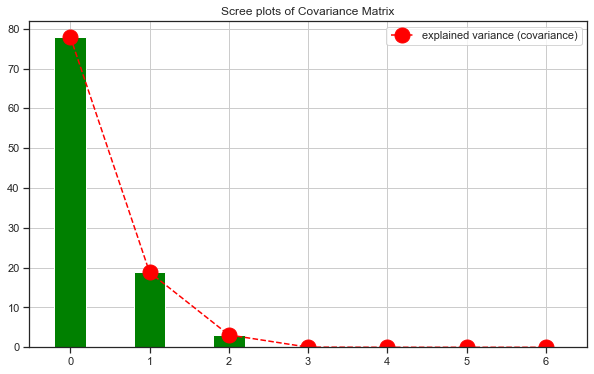

In [40]:
total_variation_covariance = np.sum(eigenvalues_covariance)
explained_variance_covariance = np.asarray(
    [100*(i/total_variation_covariance) for i in sorted(eigenvalues_covariance, reverse=True)])
print("This is the explained variance of each feature (covariance):\n\t{}"
      .format(np.array_str(explained_variance_covariance, precision=2)))
cumulative_covariance = np.cumsum(explained_variance_covariance)
print("This is the cumulative variance (covariance):\n\t{}"
      .format(np.array_str(cumulative_covariance, precision=2)))

fig1 = plt.figure(1, figsize=(10,6))
plt.title("Scree plots of Covariance Matrix")
plt.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
        height=explained_variance_covariance, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_covariance)[0]), 
         explained_variance_covariance, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance (covariance)")
plt.savefig("images/screeplot_covariance_pizza.png")
plt.legend()
plt.grid()
plt.show()

This is the explained variance of each feature (correlation):
	[59.6  32.72  5.92  1.36  0.4   0.    0.  ]
This is the cumulative variance (correlation):
	[ 59.6   92.32  98.24  99.6  100.   100.   100.  ]


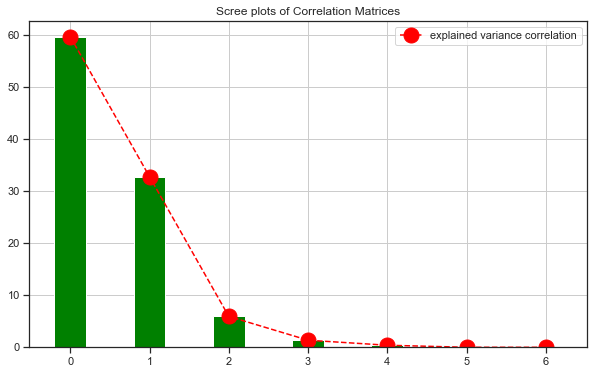

In [41]:
total_variation_correlation = np.sum(eigenvalues_correlation)
explained_variance_correlation = np.asarray(
    [100*(i/total_variation_correlation) for i in sorted(eigenvalues_correlation, reverse=True)])
print("This is the explained variance of each feature (correlation):\n\t{}"
      .format(np.array_str(explained_variance_correlation, precision=2)))
cumulative_correlation = np.cumsum(explained_variance_correlation)
print("This is the cumulative variance (correlation):\n\t{}"
      .format(np.array_str(cumulative_correlation, precision=2)))

fig2 = plt.figure(2, figsize=(10,6))
plt.title("Scree plots of Correlation Matrices")
plt.bar(x=np.arange(np.shape(explained_variance_correlation)[0]), 
        height=explained_variance_correlation, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_correlation)[0]), 
         explained_variance_correlation, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance correlation")
plt.savefig("images/screeplot_correlation_pizza.png")
plt.legend()
plt.grid()
plt.show()

In [42]:
number_k = 2

### Correlation circle (Original features and PC's of the covariance matrix C)

In [43]:
CC_Covariance = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(number_k):
        c = (np.corrcoef(X[:,i], YC[:,j])[0])[1]
        f.append(c)
    CC_Covariance.append(f)


CorrelationCircle_Covariance = np.asarray(CC_Covariance)
print(CorrelationCircle_Covariance)

[[ 0.59528872  0.7891168 ]
 [ 0.85182991 -0.08740203]
 [ 0.63808547 -0.73956184]
 [ 0.89642136 -0.32268511]
 [ 0.61769026 -0.64881903]
 [-0.99998066  0.00381554]
 [ 0.01997805 -0.99686093]]


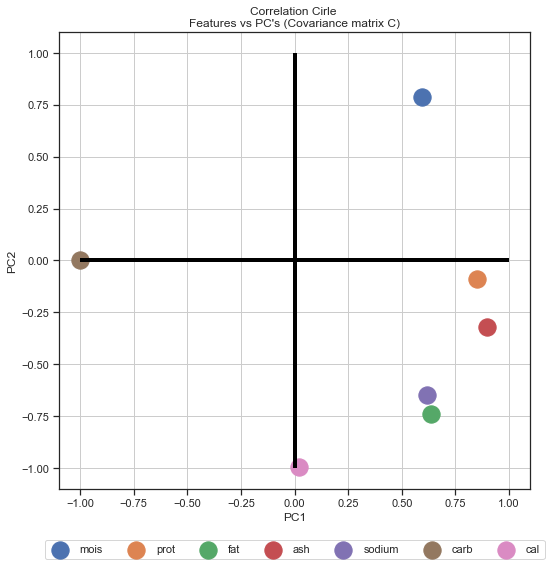

In [44]:
fig3 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Covariance matrix C)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Covariance[i:i+1,0:1], 
                CorrelationCircle_Covariance[i:i+1,1:2], s=300, label=dataframe.columns[i+2])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True, ncol=np.shape(X)[1])
plt.grid()
plt.tight_layout()
plt.savefig("images/circle_correlation_covariance_pizza.png")
plt.show()

### Correlation circle (Original features and PC's of the correlation matrix R)

In [45]:
CC_Correlation = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(number_k):
        c = (np.corrcoef(X[:,i], YR[:,j])[0])[1]
        f.append(c)
    CC_Correlation.append(f)


CorrelationCircle_Correlation = np.asarray(CC_Correlation)
print(CorrelationCircle_Correlation)

[[ 0.39254883  0.9277906 ]
 [ 0.86033461  0.67845797]
 [ 0.78677389  0.10408943]
 [ 0.95120597  0.56395434]
 [ 0.74732984  0.1343122 ]
 [-0.97344123 -0.82516403]
 [ 0.24850867 -0.54485528]]


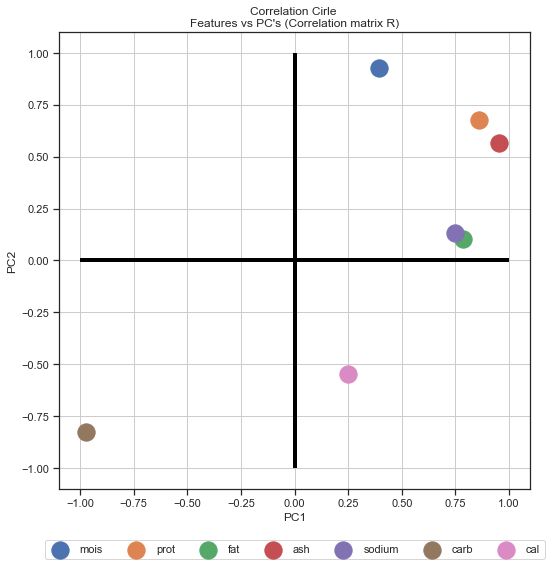

In [46]:
fig4 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Correlation matrix R)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Correlation[i:i+1,0:1], 
                CorrelationCircle_Correlation[i:i+1,1:2], 
                s=300, label=dataframe.columns[i+2])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True,ncol=np.shape(X)[1])
plt.grid()
plt.tight_layout()
plt.savefig("images/circle_correlation_correlation_pizza.png")
plt.show()

# Conclusion

### Covariance Matrix 
Using the Covariance matrix $C_{X}$ to perform PCA and choose a $k = 2$ (qualitative analysis) which is the number 
of components that retains $\sim 97\%$ of total information embedded in the dataset, it can be found that:<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 is an index of energy supply (Protein(2) + Ash(4) + Carbohydrates(6))<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC2 is an index of the heaviness of pizza (Calories(7))

### Correlation Matrix 
Using the Correlation matrix $R_{X}$ to perform PCA and choose a $k = 2$ (qualitative analysis) which is the number 
of components that retains $\sim 92\%$ of total information embedded in the dataset, it can be found that:<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 is an index of energy supply (Protein(2) + Ash(4) + Carbohydrates(6))<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC2 is an index of tastiness of dough's consistency (mois(1))
